### get pie chart of data_set size

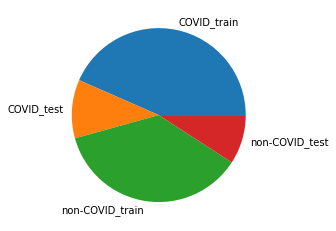

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
test_size=0.2
folders=glob.glob('data//*')
n_classes=len(folders)
lens=list()
classes=list()
for i in folders:
    len_images=len(glob.glob(f'{i}//*'))
    classs=i.split('\\')[-1]
    train_l=int(len_images*(1-test_size))
    test_l=len_images-train_l
    lens.append(int(train_l))
    classes.append(classs+'_train')
    lens.append(int(test_l))
    classes.append(classs+'_test')
lens=np.array(lens)
        
        
plt.pie(lens,labels=classes)
#plt.legend()
plt.savefig('data pie chart.png')
plt.show()
    

### bar plot

E:\conda\envs\iris\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "width" which is no longer supported as of 3.3 and will become an error two minor releases later
  


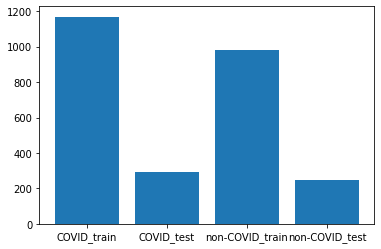

In [57]:
plt.bar(classes,lens)
plt.savefig('data bar chart.png',width=0.5)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
infected_dirs=glob.glob(r'data//COVID//*')
normal_dirs=glob.glob(r'data//non-COVID//*')
my_list=[normal_dirs,infected_dirs]
X=[]
y=[]
for index_dirs,dirs in enumerate(my_list):
    for img_dir in dirs:
        img=cv2.imread(img_dir)
        img=cv2.resize(img,(256,256))
        img=np.array(img)
        X.append(img)
        y.append(index_dirs)
        
np_x=np.array(X)
np_y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(np_x, np_y, test_size=0.2, random_state=10)


In [33]:
from keras.models import load_model
model=load_model('classfier_binary_3.h5')

Using TensorFlow backend.
E:\conda\envs\iris\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\conda\envs\iris\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\conda\envs\iris\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\conda\envs\iris\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Pas

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [34]:
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)
final_train=[]
final_test=[]
for i in pred_train:
    if i>=0.5:
        final_train.append(1)
    if i<0.5:
        final_train.append(0)
for i in pred_test:
    if i>=0.5:
        final_test.append(1)
    if i<0.5:
        final_test.append(0)
        


train_precsion valueis = 0.9332740213523132   test_precsion value is = 0.9291044776119403
train_recall value is = 0.9012027491408935       test_recall value is = 0.8383838383838383
train_f1-score is = 0.916958041958042         test_f1-score is = 0.8814159292035398
train_accurcy is = 0.9117100371747212               test_accurcy is = 0.8754646840148699



train_confusion_matrix =
-----------------------------
|           | True |  False |
|-----------|------|--------|
| Posotive  | 1049 |    75  |
|-----------|----- |--------|
| Negative  | 913  |  115   |
-----------------------------
test_confusion_matrix =
-----------------------------
|           | True |  False |
|-----------|------|--------|
| Posotive  | 249  |    19  |
|-----------|----- |--------|
| Negative  | 222  |   48   |
-----------------------------


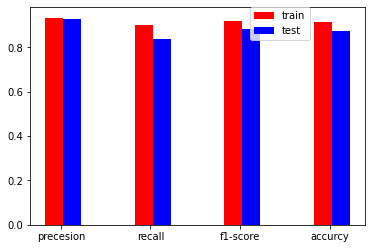

In [58]:
def draw_confusion_matrix(conf_matrix):
    tp,tn,fp,fn=conf_matrix
    print('-----------------------------')
    print('|           | True |  False |')
    print('|-----------|------|--------|')
    print(f'| Posotive  | {tp} |    {fp}  |')
    print('|-----------|----- |--------|')
    print(f'| Negative  | {tn}  |  {fn}   |')
    print('-----------------------------')
    
    
def draw_confusion_matrix2(conf_matrix):
    tp,tn,fp,fn=conf_matrix
    print('-----------------------------')
    print('|           | True |  False |')
    print('|-----------|------|--------|')
    print(f'| Posotive  | {tp}  |    {fp}  |')
    print('|-----------|----- |--------|')
    print(f'| Negative  | {tn}  |   {fn}   |')
    print('-----------------------------')
    
tp=0
fp=0
fn=0
tn=0
right=0
for i in range(len(final_train)):
    t=y_train[i]
    p=final_train[i]
    if p==t:
        right+=1
    if p==0 and t==0:
        tn+=1
    if p==0 and t==1:
        fn+=1
    if p==1 and t==0:
        fp+=1
    if p==1 and t==1:
        tp+=1

train_precesion=tp/(tp+fp)
train_recall=tp/(tp+fn)
train_f1_score=2*((train_precesion*train_recall)/(train_precesion+train_recall))
train_confusion_matrix=np.array([tp,tn,fp,fn])
train_acc=right/len(final_train)


tp=0
fp=0
fn=0
tn=0
right=0
for i in range(len(final_test)):
    t=y_test[i]
    p=final_test[i]
    if p==t:
        right+=1
    if p==0 and t==0:
        tn+=1
    if p==0 and t==1:
        fn+=1
    if p==1 and t==0:
        fp+=1
    if p==1 and t==1:
        tp+=1


        
test_precesion=tp/(tp+fp)
test_recall=tp/(tp+fn)
test_f1_score=2*((test_precesion*test_recall)/(test_precesion+test_recall))
test_confusion_matrix=np.array([tp,tn,fp,fn])
test_acc=right/len(final_test)

print(f'train_precsion valueis = {train_precesion}   test_precsion value is = {test_precesion}')
print(f'train_recall value is = {train_recall}       test_recall value is = {test_recall}')
print(f'train_f1-score is = {train_f1_score}         test_f1-score is = {test_f1_score}')
print(f'train_accurcy is = {train_acc}               test_accurcy is = {test_acc}')



print("\n\n")
print("train_confusion_matrix =")
draw_confusion_matrix(train_confusion_matrix)
print("test_confusion_matrix =")
draw_confusion_matrix2(test_confusion_matrix)

#plt.bar(['train_precesion','train_recall','train_f1_score'],np.array([train_precesion,train_recall,train_f1_score]),color='r',width=0.3)
#plt.bar(['test_precesion','test_recall','test_f1_score'], np.array([test_precesion,test_recall,test_f1_score]),color='b',width=0.3)
plt.bar([0,2,4,6],np.array([train_precesion,train_recall,train_f1_score,train_acc]),color='r',width=0.4)
plt.bar([0.4,2.4,4.4,6.4], np.array([test_precesion,test_recall,test_f1_score,test_acc]),color='b',width=0.4)
plt.legend(labels=['train','test'],bbox_to_anchor=(0.85,1.025), loc="upper right")
plt.xticks([0.15,2.15,4.15,6.15],labels=['precesion','recall','f1-score','accurcy'])
plt.savefig('model evaluation chart test-train.png')
plt.show()